For the video

For a single image

1/1 [==============================] - 0s 195ms/step
3


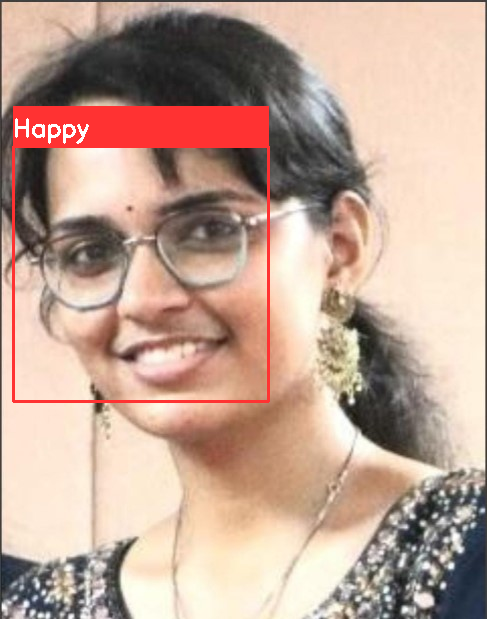

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
from google.colab.patches import cv2_imshow

class_names = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
model = tf.keras.models.load_model('/content/drive/MyDrive/ipams_face/final_model_weights.hdf5')

# Load the single screenshot image
image_path = '/content/manasa.jpg'
frame = cv2.imread(image_path)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = faceDetect.detectMultiScale(gray, 1.3, 3)

for x, y, w, h in faces:
    sub_face_img = gray[y: y + h, x: x + w]
    resized = cv2.resize(sub_face_img, (48, 48))
    normalized = resized / 255.0
    reshaped = np.reshape(normalized, (1, 48, 48, 1))
    result = model.predict(reshaped)
    label = np.argmax(result, axis=1)[0]
    print(label)
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 1)
    cv2.rectangle(frame, (x, y), (x + w, y + h), (50, 50, 255), 2)
    cv2.rectangle(frame, (x, y - 40), (x + w, y), (50, 50, 255), -1)
    cv2.putText(frame, class_names[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

cv2_imshow(frame)  # Display the frame using cv2_imshow
cv2.waitKey(0)
cv2.destroyAllWindows()


For video into img frames

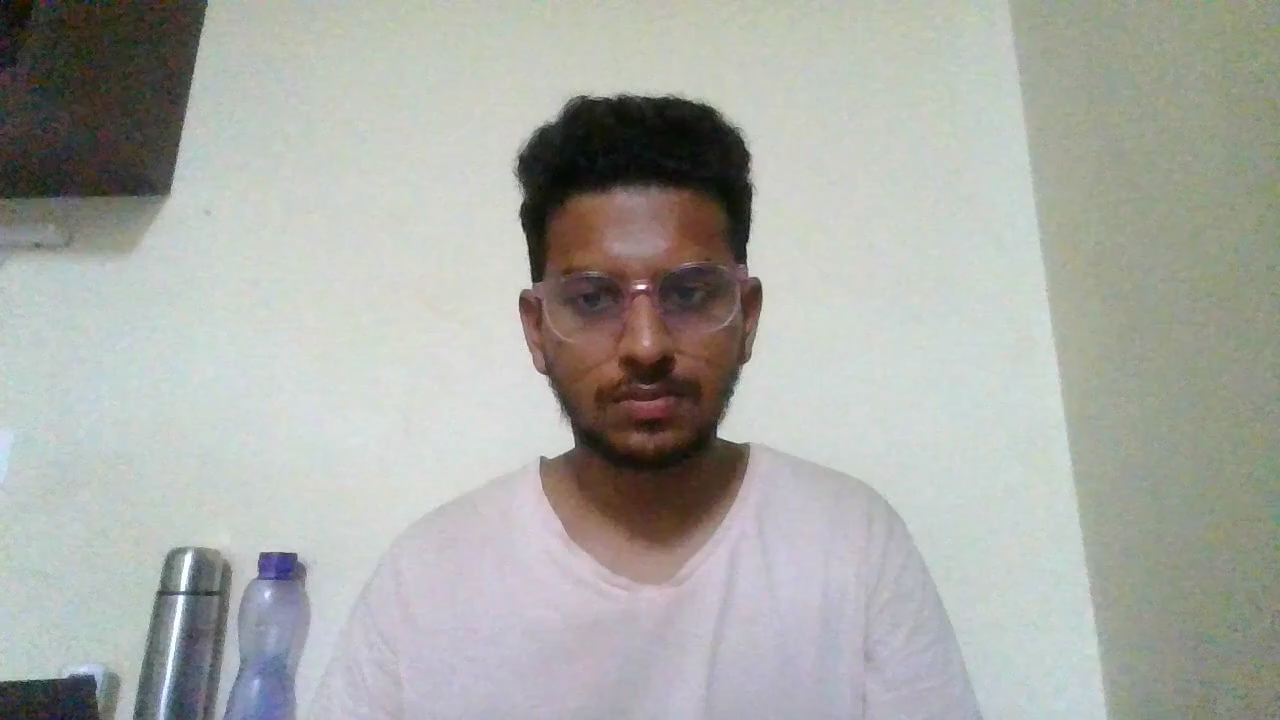

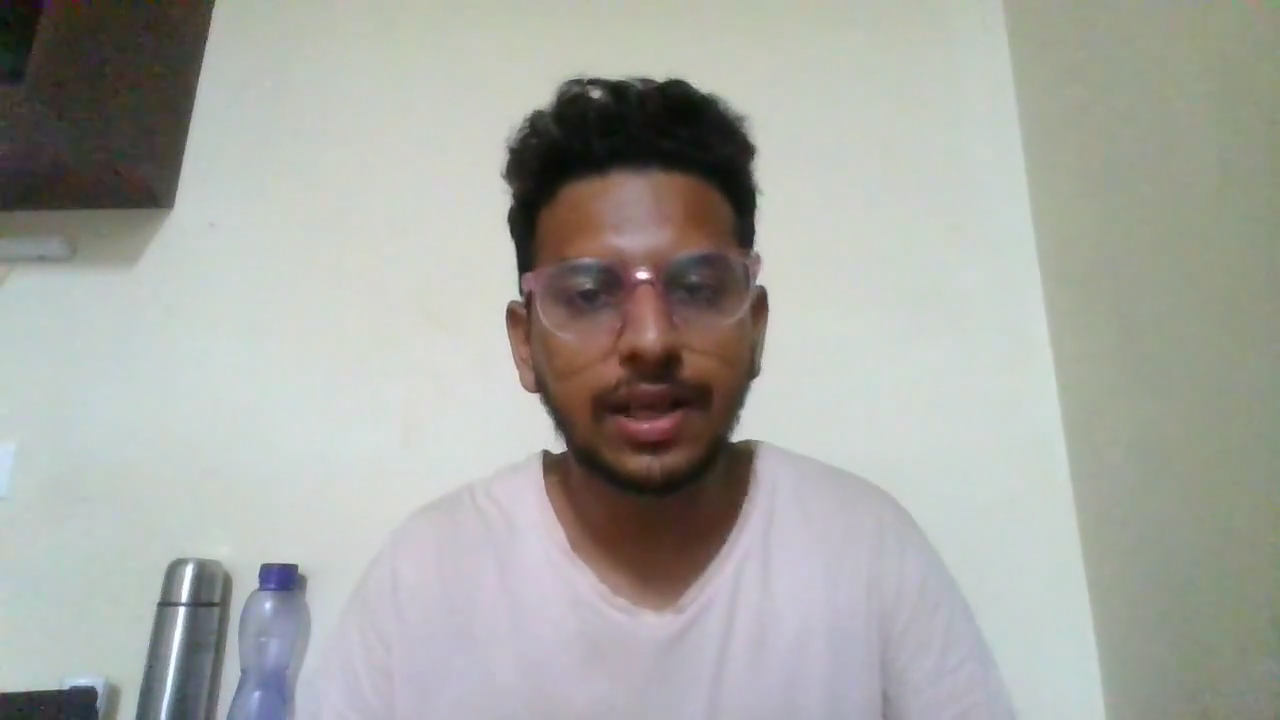

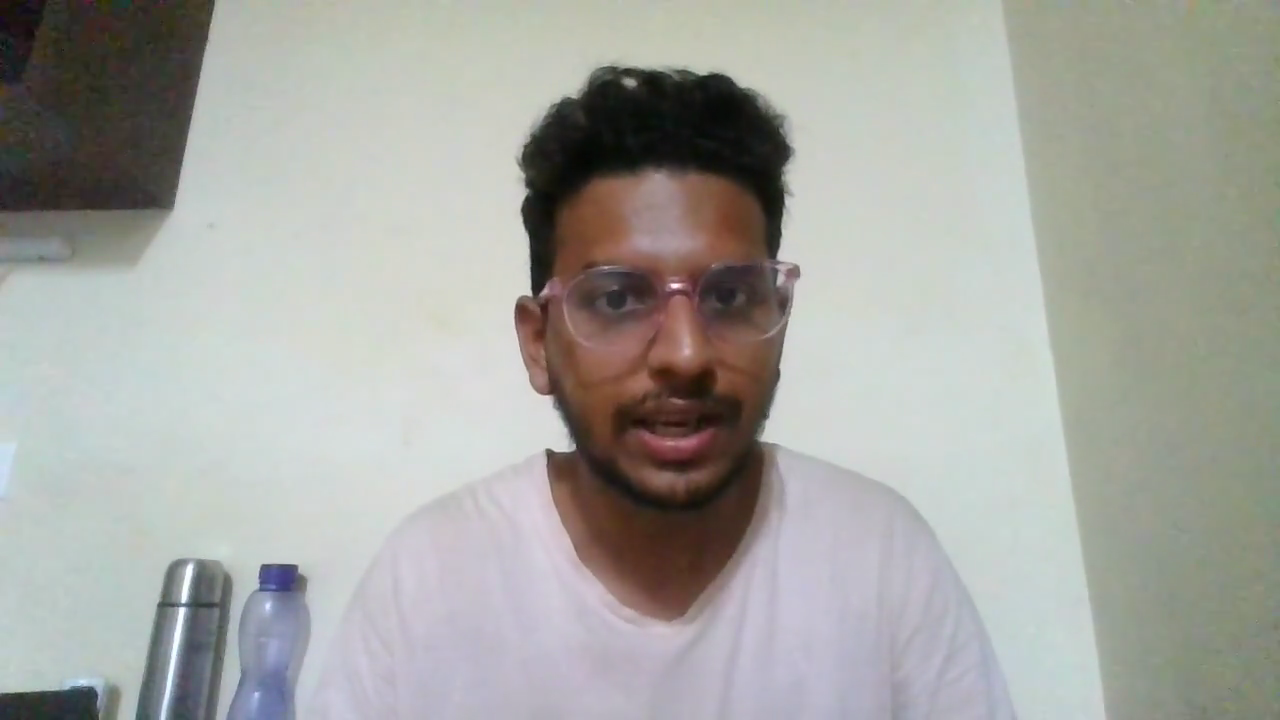

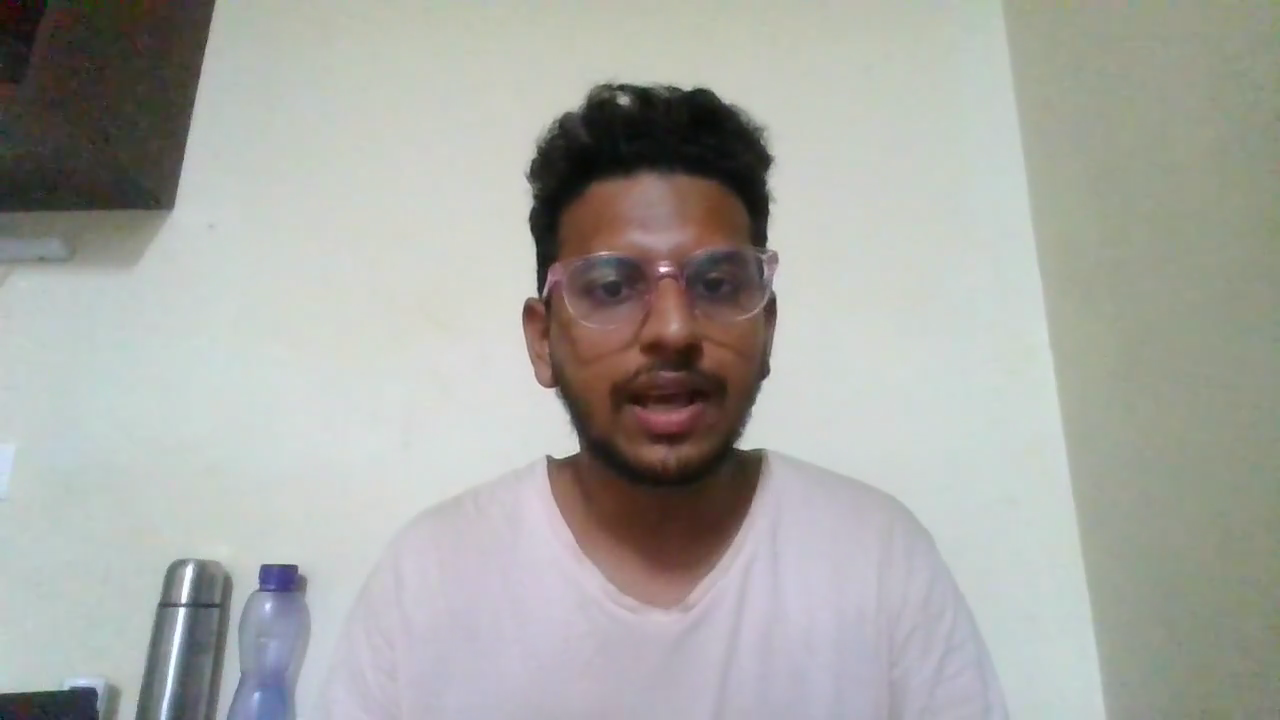

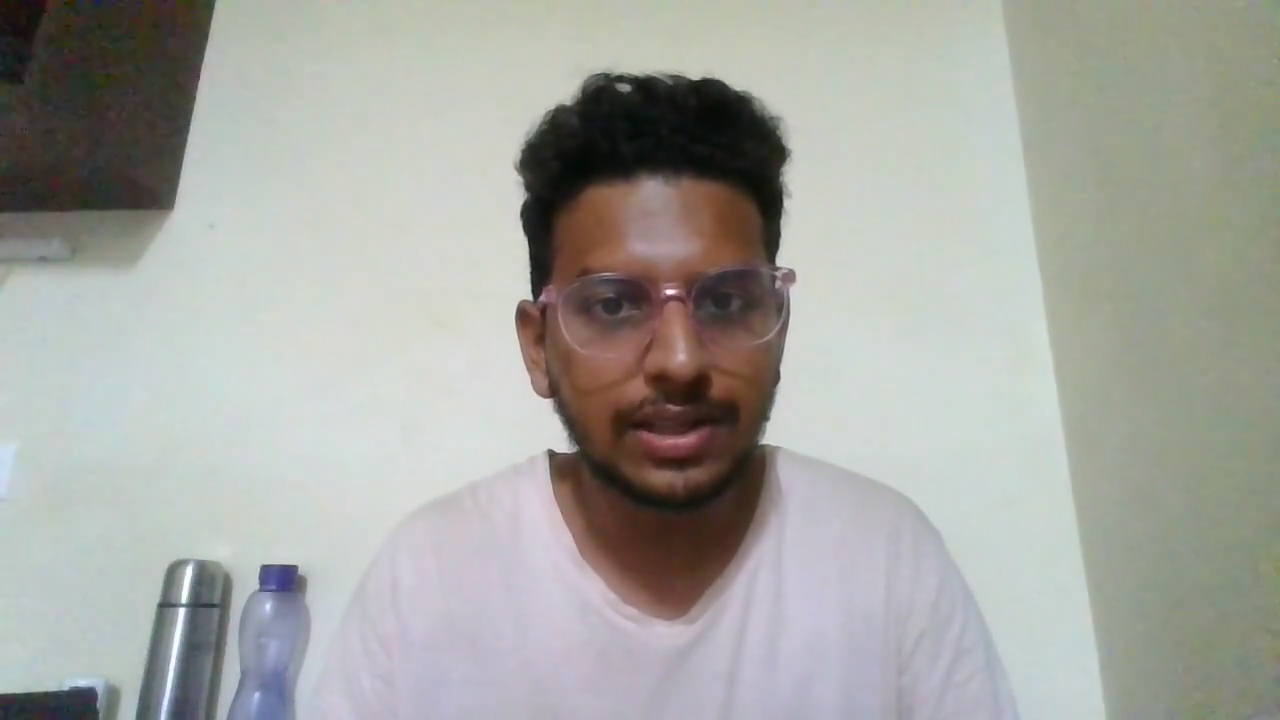

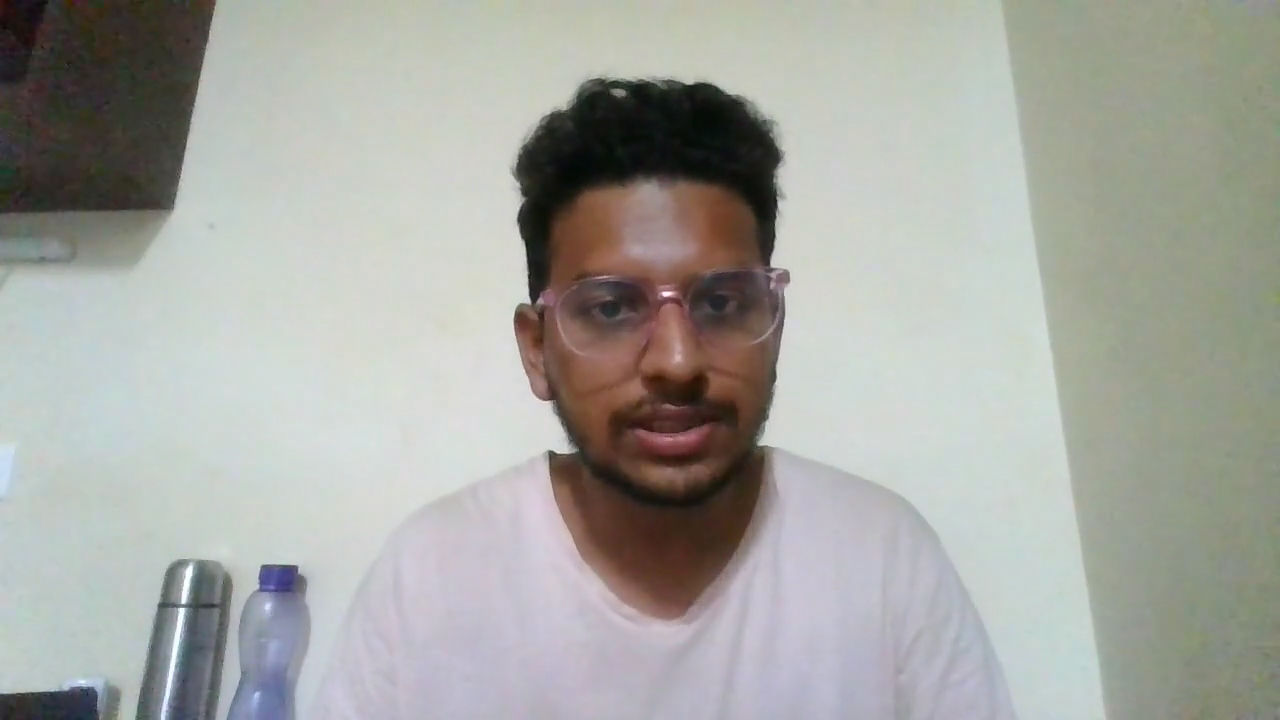

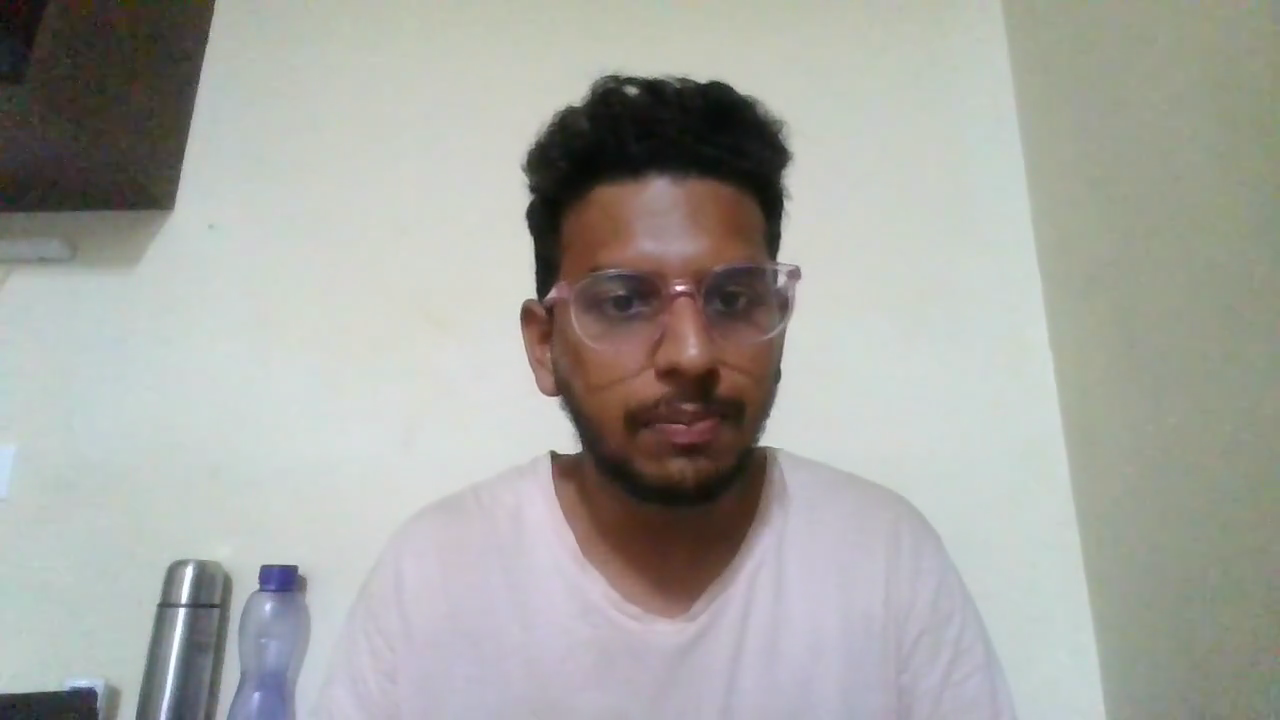

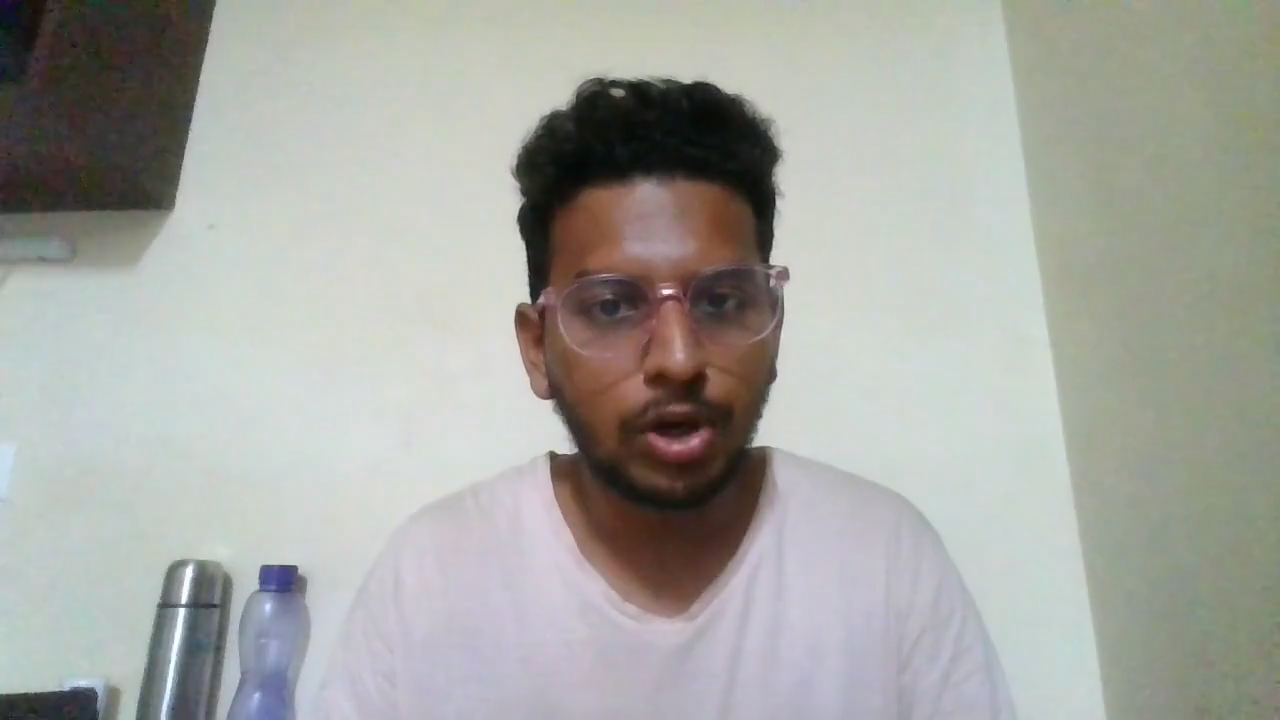

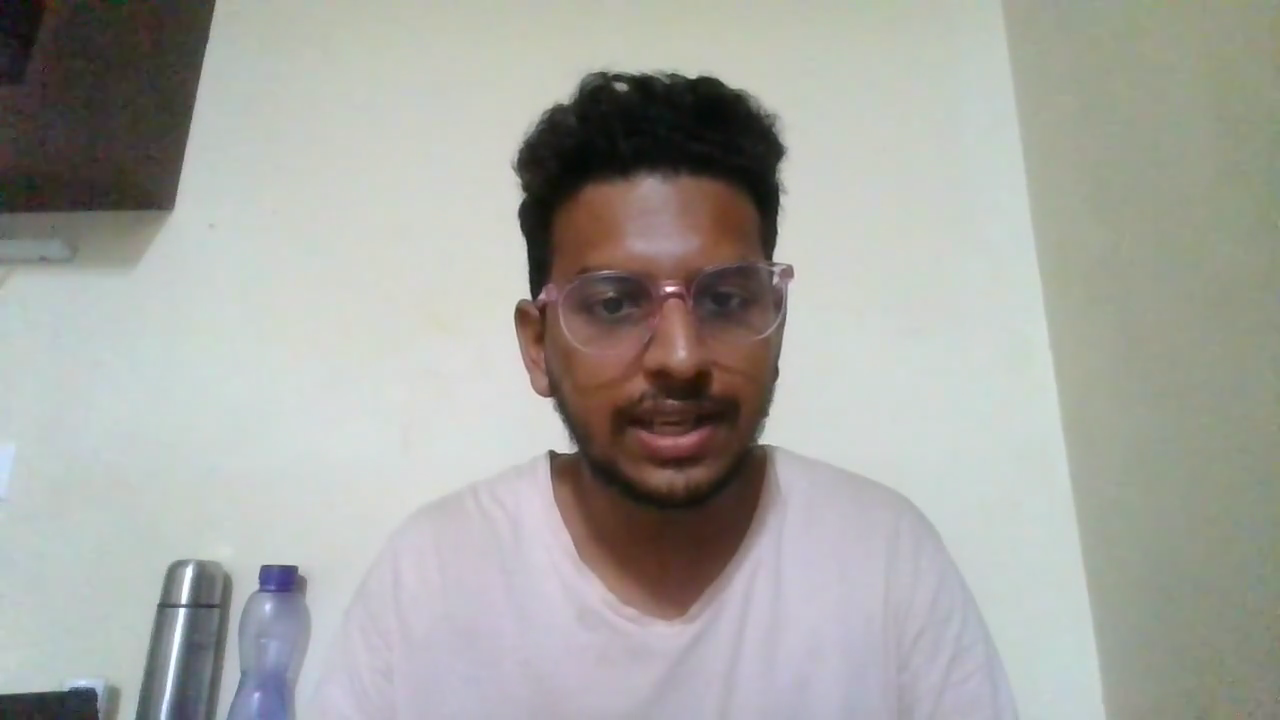

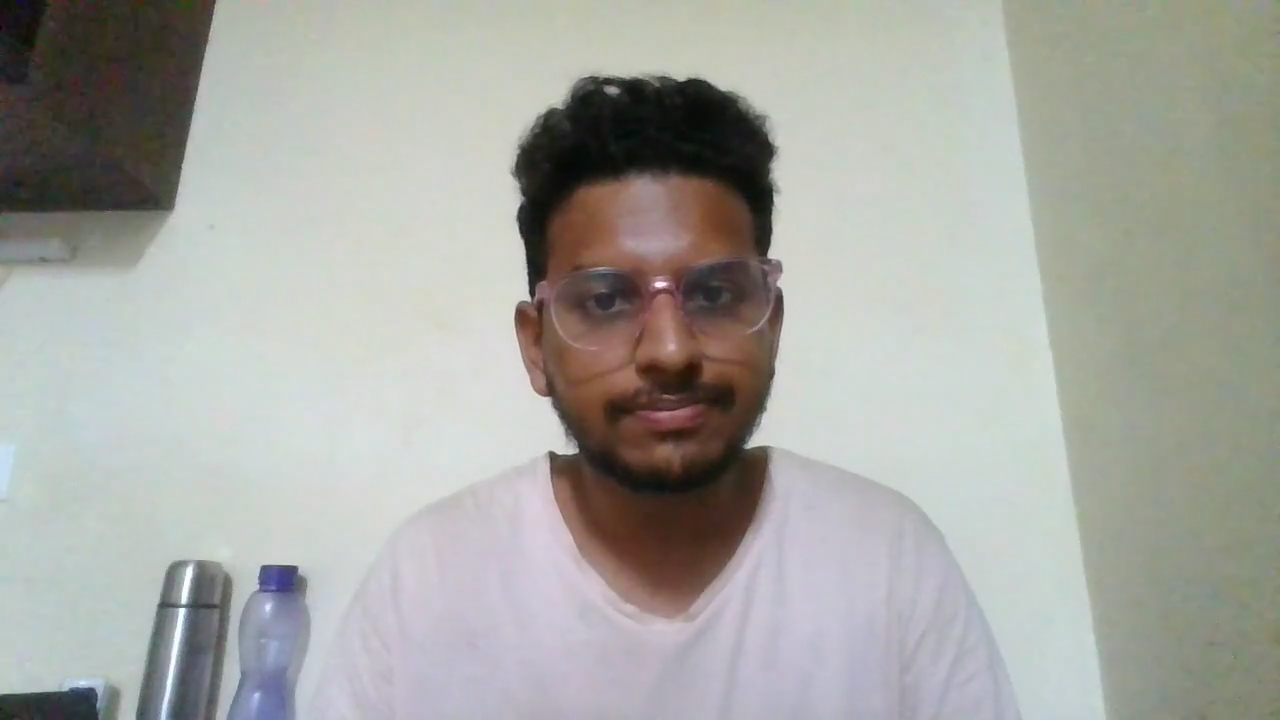

1/1 [==============================] - 0s 195ms/step
Neutral
1/1 [==============================] - 0s 36ms/step
Sad
1/1 [==============================] - 0s 25ms/step
Sad
1/1 [==============================] - 0s 28ms/step
Sad
1/1 [==============================] - 0s 26ms/step
Sad
1/1 [==============================] - 0s 26ms/step
Sad
1/1 [==============================] - 0s 29ms/step
Sad
1/1 [==============================] - 0s 26ms/step
Sad
1/1 [==============================] - 0s 26ms/step
Sad
1/1 [==============================] - 0s 31ms/step
Sad


In [ ]:
import cv2
import tensorflow as tf
import numpy as np
from google.colab.patches import cv2_imshow

class_names = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
model = tf.keras.models.load_model('/content/drive/MyDrive/ipams_face/final_model_weights.hdf5')
video = cv2.VideoCapture('/content/drive/MyDrive/ipams_face/21BCE9413 (1).mp4')
faceDetect = cv2.CascadeClassifier('/content/drive/MyDrive/ipams_face/haarcascade_frontalface_default.xml')

# Calculate the total number of frames in the video
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
# Set the desired number of frames to extract
num_frames_to_extract = 10
# Calculate the interval to skip frames
frame_interval = total_frames // num_frames_to_extract

frame_number = 0
frames_to_predict = []

while True:
    ret, frame = video.read()
    if not ret:
        break

    # Process every nth frame
    if frame_number % frame_interval == 0:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = faceDetect.detectMultiScale(gray, 1.3, 3)

        for x, y, w, h in faces:
            sub_face_img = gray[y: y + h, x: x + w]
            resized = cv2.resize(sub_face_img, (48, 48))
            normalized = resized / 255.0
            reshaped = np.reshape(normalized, (1, 48, 48, 1))
            frames_to_predict.append(reshaped)

        # Show the frame (optional, you can remove this if you don't want to display frames)
        cv2_imshow(frame)

        if len(frames_to_predict) == num_frames_to_extract:
            break

    frame_number += 1

# Make predictions on the extracted frames
for frame_data in frames_to_predict:
    result = model.predict(frame_data)
    label = np.argmax(result, axis=1)[0]
    print(class_names[label])

# Release video object
video.release()


outputs in percentages

In [ ]:
import cv2
import tensorflow as tf
import numpy as np

class_names = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
model = tf.keras.models.load_model('/content/drive/MyDrive/ipams_face/final_model_weights.hdf5')
video = cv2.VideoCapture('/content/drive/MyDrive/ipams_face/21BCE9413 (1).mp4')
faceDetect = cv2.CascadeClassifier('/content/drive/MyDrive/ipams_face/haarcascade_frontalface_default.xml')

# Calculate the total number of frames in the video
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
# Set the desired number of frames to extract
num_frames_to_extract = 20
# Calculate the interval to skip frames
frame_interval = total_frames // num_frames_to_extract

frame_number = 0
frames_to_predict = []

while True:
    ret, frame = video.read()
    if not ret:
        break

    # Process every nth frame
    if frame_number % frame_interval == 0:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = faceDetect.detectMultiScale(gray, 1.3, 3)

        for x, y, w, h in faces:
            sub_face_img = gray[y: y + h, x: x + w]
            resized = cv2.resize(sub_face_img, (48, 48))
            normalized = resized / 255.0
            reshaped = np.reshape(normalized, (1, 48, 48, 1))
            frames_to_predict.append(reshaped)

        if len(frames_to_predict) == num_frames_to_extract:
            break

    frame_number += 1

# Make predictions on the extracted frames
predictions = []
for frame_data in frames_to_predict:
    result = model.predict(frame_data)
    label = np.argmax(result, axis=1)[0]
    predictions.append(label)

# Calculate percentage for each class_name
total_predictions = len(predictions)
percentage_dict = {}
for class_name in class_names:
    class_count = predictions.count(class_names.index(class_name))
    percentage = (class_count / total_predictions) * 100
    percentage_dict[class_name] = percentage

# Print the percentages
for class_name, percentage in percentage_dict.items():
    print(f"{class_name}: {percentage:.2f}%")

# Release video object
video.release()


1/1 [==============================] - 0s 32ms/step
Angry: 0.00%
Disgust: 0.00%
Fear: 5.00%
Happy: 0.00%
Neutral: 30.00%
Sad: 65.00%
Surprise: 0.00%


In [11]:
import cv2
import tensorflow as tf
import numpy as np

def predict_emotion_percentages(video_path, num_frames_to_extract):
    class_names = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
    model = tf.keras.models.load_model('/content/drive/MyDrive/ipams_face/final_model_weights.hdf5')
    video = cv2.VideoCapture(video_path)
    faceDetect = cv2.CascadeClassifier('/content/drive/MyDrive/ipams_face/haarcascade_frontalface_default.xml')

    # Calculate the total number of frames in the video
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    # Calculate the interval to skip frames
    frame_interval = total_frames // num_frames_to_extract

    frame_number = 0
    frames_to_predict = []

    while True:
        ret, frame = video.read()
        if not ret:
            break

        # Process every nth frame
        if frame_number % frame_interval == 0:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = faceDetect.detectMultiScale(gray, 1.3, 3)

            for x, y, w, h in faces:
                sub_face_img = gray[y: y + h, x: x + w]
                resized = cv2.resize(sub_face_img, (48, 48))
                normalized = resized / 255.0
                reshaped = np.reshape(normalized, (1, 48, 48, 1))
                frames_to_predict.append(reshaped)

            if len(frames_to_predict) == num_frames_to_extract:
                break

        frame_number += 1

    # Make predictions on the extracted frames
    predictions = []
    for frame_data in frames_to_predict:
        result = model.predict(frame_data)
        label = np.argmax(result, axis=1)[0]
        predictions.append(label)

    # Calculate percentage for each class_name
    total_predictions = len(predictions)
    percentage_dict = {}
    for class_name in class_names:
        class_count = predictions.count(class_names.index(class_name))
        percentage = (class_count / total_predictions) * 100
        percentage_dict[class_name] = percentage

    # Release video object
    video.release()

    return percentage_dict



In [12]:

# Example usage:
video_path = '/content/drive/MyDrive/ipams_face/21BCE9413 (1).mp4'
num_frames_to_extract = 10
emotion_percentages = predict_emotion_percentages(video_path, num_frames_to_extract)
for class_name, percentage in emotion_percentages.items():
    print(f"{class_name}: {percentage:.2f}%")


1/1 [==============================] - 0s 22ms/step
Angry: 0.00%
Disgust: 0.00%
Fear: 0.00%
Happy: 0.00%
Neutral: 10.00%
Sad: 90.00%
Surprise: 0.00%


confidence and stress

In [13]:
import cv2
import tensorflow as tf
import numpy as np

def predict_emotion_percentages(video_path, num_frames_to_extract):
    class_names = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
    model = tf.keras.models.load_model('/content/drive/MyDrive/ipams_face/final_model_weights.hdf5')
    video = cv2.VideoCapture(video_path)
    faceDetect = cv2.CascadeClassifier('/content/drive/MyDrive/ipams_face/haarcascade_frontalface_default.xml')

    # Calculate the total number of frames in the video
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    # Calculate the interval to skip frames
    frame_interval = total_frames // num_frames_to_extract

    frame_number = 0
    frames_to_predict = []

    while True:
        ret, frame = video.read()
        if not ret:
            break

        # Process every nth frame
        if frame_number % frame_interval == 0:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = faceDetect.detectMultiScale(gray, 1.3, 3)

            for x, y, w, h in faces:
                sub_face_img = gray[y: y + h, x: x + w]
                resized = cv2.resize(sub_face_img, (48, 48))
                normalized = resized / 255.0
                reshaped = np.reshape(normalized, (1, 48, 48, 1))
                frames_to_predict.append(reshaped)

            if len(frames_to_predict) == num_frames_to_extract:
                break

        frame_number += 1

    # Make predictions on the extracted frames
    predictions = []
    for frame_data in frames_to_predict:
        result = model.predict(frame_data)
        label = np.argmax(result, axis=1)[0]
        predictions.append(label)

    # Calculate percentage for each class_name
    total_predictions = len(predictions)
    percentage_dict = {}
    for class_name in class_names:
        class_count = predictions.count(class_names.index(class_name))
        percentage = (class_count / total_predictions) * 100
        percentage_dict[class_name] = percentage

    # Calculate confidence percentage (Happy + Neutral + Surprise + Angry)
    confidence_percentage = (percentage_dict["Happy"] + percentage_dict["Neutral"] + percentage_dict["Surprise"] + percentage_dict["Angry"])
    # Calculate stress percentage (Disgust + Fear + Sad)
    stress_percentage = (percentage_dict["Disgust"] + percentage_dict["Fear"] + percentage_dict["Sad"])

    # Release video object
    video.release()

    return confidence_percentage, stress_percentage

In [14]:
video_path = '/content/drive/MyDrive/ipams_face/21BCE9413 (1).mp4'
num_frames_to_extract = 100
confidence_percentage, stress_percentage = predict_emotion_percentages(video_path, num_frames_to_extract)

print(f"Confidence Percentage: {confidence_percentage:.2f}%")
print(f"Stress Percentage: {stress_percentage:.2f}%")

1/1 [==============================] - 0s 19ms/step
Confidence Percentage: 16.00%
Stress Percentage: 84.00%
